## Buliding Sentimental Analysis system with ML Based Approach

Sentiment Analysis has become increasingly important as more opinions are expressed online, in unstructured form.

Built a Sentimental Analyzer of Hotel Reviews in Eupore
to predict the customer satisfication using Machine Learning Approach(Naive Bayes Classifier) from scratch.

#### Importing Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nltk

#### Read the Reviews

In [ ]:
negativeReviewFileName = "/Users/priya/Documents/Intern/Sentimental_analysis/nega.txt"

with open(negativeReviewFileName, 'r') as f:
    negativeReview = f.readlines()

In [62]:
len(negativeReview)

4578

In [63]:
positiveReviewFileName = "/Users/priya/Documents/Intern/Sentimental_analysis/posi.txt"

with open(positiveReviewFileName, 'r') as f:
    positiveReview = f.readlines()

In [118]:
positiveReview[10]

' Rooms were stunningly decorated and really spacious in the top of the building Pictures are of room 300 The true beauty of the building has been kept but modernised brilliantly Also the bath was lovely and big and inviting Great more for couples Restaurant menu was a bit pricey but there were loads of little eatery places nearby within walking distance and the tram stop into the centre was about a 6 minute walk away and only about 3 or 4 stops from the centre of Amsterdam Would recommend this hotel to anyone it s unbelievably well priced too \n'

In [65]:
len(positiveReview)

4579

#### STEP 1 : Split Corpus into Training and Testing

In [66]:
#out of 514889 -- o to 2200 as training, 2201 to 4579 as test
testTrainingSplitIndex = 2200

#training set
trainingPositiveReview =  positiveReview[:testTrainingSplitIndex]
trainingNegativeReview = negativeReview[:testTrainingSplitIndex]

#test set
testPositiveReview = positiveReview[testTrainingSplitIndex+1:]
testNegativeReview = negativeReview[testTrainingSplitIndex+1:]

In [67]:
len(trainingPositiveReview)

2200

#### STEP 2 : Define Vocabulary of Training data


In [68]:
def getVocabulary():
    positiveWordList = [word for line in trainingPositiveReview for word in line.split()]
    negativeWordList = [word for line in trainingNegativeReview for word in line.split()]
 #a list in which each word in training data occur exactly once
   
    allWordList = [item for sublist in [positiveWordList,negativeWordList] for item in sublist]
    allWordSet = list(set(allWordList))
    vocabulary = allWordSet
    return vocabulary


In [69]:
vocabulary = getVocabulary()
vocabulary[0]

'Wasn'

In [70]:
#no of unique words present in positive and negative
len(vocabulary)

6065

#### STEP 3: Data Transformation

In [71]:
# dividing features into review and label in the form of  tuples
#setting up the data in the form that is accepted my nltk

def getTrainingData():
    negTaggedTrainingReviewList = [{'review' :oneReview.split(), 'label' : 'negative'} for oneReview in trainingNegativeReview]
    posTaggedTrainingReviewList = [{'review' :oneReview.split(), 'label' : 'positive'} for oneReview in trainingPositiveReview]
    fullTaggedTrainingData = [item for sublist in [negTaggedTrainingReviewList,posTaggedTrainingReviewList] for item in sublist]
    trainingData =[(review['review'],review['label']) for review in fullTaggedTrainingData]
    return trainingData

In [111]:
''' As we see here, The review is in form of array and label is present (TUPLES)'''

trainingData = getTrainingData()
trainingData[782]

(['Disabled', 'access'], 'negative')

In [74]:
#length of overall training data is 4400 (ie., 2200 training_postive and 2200 training-negative)
len(trainingData)

4400

#### STEP 4 : Feature Extraction using nltk

In [80]:
# feature extarction -->func takes in review and return feature vector

def extract_features(review):
    review_words = set(review)
    features = {}  #returns dictionary
    
    for words in vocabulary:
        features[words] =(words in review_words)
    return features  

#### STEP 5: Training the Classifier

In [81]:
def getTrainedNaiveBayesClassifier(extract_features,trainingData):
    #covert training data into list of feature vectors
    trainingFeatures = nltk.classify.apply_features(extract_features, trainingData)
    
    #returns trained Naive Bayes classifier
    trainedNBClassifier = nltk.NaiveBayesClassifier.train(trainingFeatures)
    return trainedNBClassifier

In [82]:
#we save the return value in object "trainedNBclassifier" and use it to run the test data
trainedNBClassifier = getTrainedNaiveBayesClassifier(extract_features,trainingData)

#### Using the Classifier

In [83]:
def naiveBayesSentimentalCal(review):
    problemInstance = review.split()
    
    #naive bayes classifier needs inout in the format of feature vector
    problemFeatures = extract_features(problemInstance)  
    return trainedNBClassifier.classify(problemFeatures)


In [88]:
#test drive for classifier
naiveBayesSentimentalCal("What an awesome movie")

'positive'

In [89]:
naiveBayesSentimentalCal("What an terrible movie")

'negative'

#### STEP 6: Invoke using test harness

In [90]:
def getTestReviewSenti(naiveBayesSentimentalCal):
    
    #function is applied to each and every review in positive and negative training
    testNegResults = [naiveBayesSentimentalCal(review) for review in testNegativeReview]
    testPosResults = [naiveBayesSentimentalCal(review) for review in testPositiveReview]
    labelToNum ={'positive': 1, 'negative': -1}
    
    numericNegResults = [labelToNum[x] for x in testNegResults]
    numericPosResults = [labelToNum[x] for x in testPosResults]
    
    # returns dictionary with 2 lists
    return { 'result_on_positive' : numericPosResults,'result_on_negative' : numericNegResults }

#### Testing Accuracy of the Classifier

In [85]:
#Testing Accuracy 

def runDiagnostics(reviewResult): 
    positiveReviewsResult = reviewResult['result_on_positive']
    negativeReviewsResult = reviewResult['result_on_negative'] 
    
    numTruePositive = sum(x > 0 for x in positiveReviewsResult)
    numTrueNegative = sum(x < 0 for x in negativeReviewsResult)
    
    pctTruePositive = float(numTruePositive) /len(positiveReviewsResult) 
    pctTrueNegative = float(numTrueNegative)/len(negativeReviewsResult) 
    totalAccurate = numTruePositive + numTrueNegative
    
    
    total = len(positiveReviewsResult) + len(negativeReviewsResult) 
    print ("Accuracy on positive reviews = " + "%.2f" % (pctTruePositive*100) + "%")
    print ("Accurance on negative reviews = "+" %.2f" % (pctTrueNegative*100) + "%" )
    print("Overall accuracy = " + " %.2f" % (totalAccurate*100/total) + "%")
    
    

In [86]:
runDiagnostics(getTestReviewSenti(naiveBayesSentimentalCal))

Accuracy on positive reviews = 90.45%
Accurance on negative reviews =  93.82%
Overall accuracy =  92.13%


#### Visualization

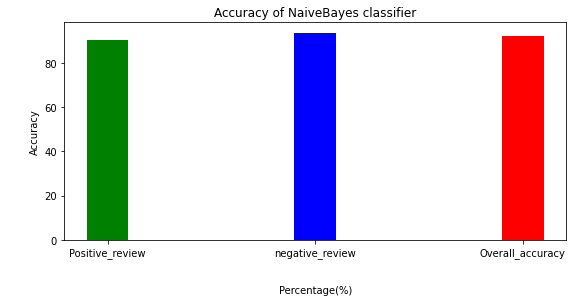

In [115]:
# creating the dataset

data = {'Positive_review':90.45, 'negative_review': 93.82, 'Overall_accuracy':92.13}
Accuracy = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (9,4))
 
# creating the bar plot
plt.bar(Accuracy, Values,color =['green','blue', 'red'],width = 0.2)
 
plt.xlabel("\n\nPercentage(%)")
plt.ylabel("\n\nAccuracy")
plt.title("Accuracy of NaiveBayes classifier")
plt.show()

#### By using, NaiveBayes Classifier we obtained Overall accuracy score of about 92.13%.Accuracy of positive and Negative reviews are 90.45 and 93.82 respectively. Hence, We conclude that our Sentimental Classifier Performs well with high accuracy.